# Problem Statement

One of our customers strongly believes in technology and has recently backed up its platform using Machine Learning and Artificial Intelligence. 

Based on data collected from multiple sources on different songs and various artist attributes our customer is excited to challenge the MachineHack community.

By analyzing the chartbusters data to predict the Views of songs, MachineHackers would advance the state of the current platform. This can help our customer understand user behaviour and personalize the user experience. 

In this hackathon, we challenge the MachineHackers to come up with a prediction algorithm that can predict the views for a given song.

Can you predict how popular a song will be in the future?


### Files description:
Data_Train.csv – the training set, 78458 rows with 11 columns.

Data_Test.csv – the test set, 19615 rows with 10 columns, except the Views column.

Sample_Submission.csv – sample submission file format for reference.

Brief Descriptions of Attributes in Dataset
1.	Unique_ID : Unique Identifier.
2.	Name : Name of the Artist.
3.	Genre : Genre of the Song.
4.	Country : Origin Country of Artist.
5.	Song_Name : Name of the Song.
6.	Timestamp : Release Date and Time.
7.	Views : Number of times the song was played/viewed (*Target/Dependent Variable*).
8.	Comments : Count of comments for the song.
9.	Likes : Count of Likes.
10.	Popularity : Popularity score for the artist.
11.	Followers : Number of Followers.

# Read Data

In [1]:
train_data = pd.read_csv("Data_Train.csv")
train_data.shape

(78458, 11)

In [2]:
train_data.head(5)

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030


# Removing Duplicate "Unique_ID"

In [3]:
train_data_copy = train_data.copy()

In [4]:
# Sorting by Unique_ID
train_data.sort_values("Unique_ID", inplace = True) 
  
# Making a bool series 
bool_series = train_data["Unique_ID"].duplicated(keep = False)
  
# passing NOT of bool series to see unique values only 
train_data = train_data[~bool_series]


In [5]:
train_data.shape

(78458, 11)

#### No Duplicate IDs found

# Dropping irrelevant columns

In [6]:
train_data.columns

Index(['Unique_ID', 'Name', 'Genre', 'Country', 'Song_Name', 'Timestamp',
       'Views', 'Comments', 'Likes', 'Popularity', 'Followers'],
      dtype='object')

In [7]:
# Arranging the COLUMNS and dropping 'Unique_ID', 'Name', 'Country' & 'Song_Name'
train_data = train_data[['Genre', 'Timestamp', 'Comments', 'Likes', 'Popularity', 'Followers', 'Views']]

# Label-encoding of strings

In [8]:
# applying labelecoder on Delivery_Time column
from sklearn.preprocessing import LabelEncoder
laben = LabelEncoder()

In [9]:
train_data.Genre.value_counts()

danceedm                22633
electronic              18331
all-music               10277
rbsoul                   5411
latin                    4562
trap                     4055
rock                     4000
deephouse                2423
pop                      1787
dubstep                  1100
ambient                   847
classical                 767
drumbass                  671
metal                     523
disco                     374
country                   336
alternativerock           156
hiphoprap                 100
reggaeton                  55
folksingersongwriter       39
indie                      11
Name: Genre, dtype: int64

In [10]:
train_data.Country.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Country'

In [11]:
train_data['Genre'] = laben.fit_transform(train_data['Genre'])

# Pre-processing of Timestamp column

#### Resetting index

In [12]:
train_data = train_data.reset_index().drop(['index'], axis=1)

#### Calculating AGE of the Song 

In [13]:
train_data['Date_of_release'] = train_data.Timestamp.str.split(" ", n = 1, expand = True)[0]

In [14]:
train_data

,Genre,Timestamp,Comments,Likes,Popularity,Followers,Views,Date_of_release
0,0,2019-02-24 21:32:16.000000,0,74,2,103,309,2019-02-24
1,0,2019-02-24 21:25:50.000000,0,27,1,103,137,2019-02-24
2,0,2019-02-24 15:32:21.000000,2,"1,055",35,103,4697,2019-02-24
3,0,2019-02-22 14:30:47.000000,0,192,23,103,1663,2019-02-22
4,0,2019-02-21 23:37:15.000000,0,11,0,103,142,2019-02-21
5,0,2019-02-21 23:17:56.000000,0,16,0,103,130,2019-02-21
6,0,2019-02-12 18:52:59.000000,0,39,2,103,377,2019-02-12
7,0,2019-01-05 04:51:23.000000,0,31,2,103,504,2019-01-05
8,0,2018-12-27 23:39:03.000000,0,10,1,103,83,2018-12-27
9,0,2018-12-02 23:04:42.000000,0,15,2,103,189,2018-12-02


In [15]:
train_data['Date_of_release'] = pd.to_datetime(train_data['Date_of_release'])

In [16]:
train_data['Today'] = pd.to_datetime('2019-12-30')

In [17]:
train_data['No_Of_Days'] = (train_data['Today'] - train_data['Date_of_release'])

In [18]:
train_data

,Genre,Timestamp,Comments,Likes,Popularity,Followers,Views,Date_of_release,Today,No_Of_Days
0,0,2019-02-24 21:32:16.000000,0,74,2,103,309,2019-02-24,2019-12-30,309 days
1,0,2019-02-24 21:25:50.000000,0,27,1,103,137,2019-02-24,2019-12-30,309 days
2,0,2019-02-24 15:32:21.000000,2,"1,055",35,103,4697,2019-02-24,2019-12-30,309 days
3,0,2019-02-22 14:30:47.000000,0,192,23,103,1663,2019-02-22,2019-12-30,311 days
4,0,2019-02-21 23:37:15.000000,0,11,0,103,142,2019-02-21,2019-12-30,312 days
5,0,2019-02-21 23:17:56.000000,0,16,0,103,130,2019-02-21,2019-12-30,312 days
6,0,2019-02-12 18:52:59.000000,0,39,2,103,377,2019-02-12,2019-12-30,321 days
7,0,2019-01-05 04:51:23.000000,0,31,2,103,504,2019-01-05,2019-12-30,359 days
8,0,2018-12-27 23:39:03.000000,0,10,1,103,83,2018-12-27,2019-12-30,368 days
9,0,2018-12-02 23:04:42.000000,0,15,2,103,189,2018-12-02,2019-12-30,393 days


In [19]:
train_data['No_Of_Days'] = train_data['No_Of_Days'].astype(str).str.split(" ", n = 1, expand = True)[0]

# Dropping Date and Timestamp columns

In [20]:
train_data.columns

Index(['Genre', 'Timestamp', 'Comments', 'Likes', 'Popularity', 'Followers',
       'Views', 'Date_of_release', 'Today', 'No_Of_Days'],
      dtype='object')

In [21]:
train_data.drop(['Timestamp', 'Date_of_release', 'Today'], axis=1, inplace=True)

In [22]:
train_data.columns

Index(['Genre', 'Comments', 'Likes', 'Popularity', 'Followers', 'Views',
       'No_Of_Days'],
      dtype='object')

# Separating X and Y

In [23]:
x = train_data[['Genre', 'Comments', 'Likes', 'Popularity', 'Followers', 'No_Of_Days']]
y = train_data['Views']

# Data Standanrdization

In [24]:
x.describe()

,Genre,Comments,Followers
count,78458.000000,78458.000000,7.845800e+04
mean,8.750516,115.270973,4.787663e+05
std,5.955352,724.614868,1.168120e+06
min,0.000000,0.000000,1.000000e+00
25%,5.000000,1.000000,1.770000e+04
50%,9.000000,12.000000,8.768200e+04
75%,14.000000,61.000000,3.936550e+05
max,20.000000,104082.000000,9.789123e+06


# Data Transformation

In [25]:
x['Likes'] = x['Likes'].replace({",":"", "K":"", "M":""}, regex=True)
x['Likes'] = x['Likes'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
x['Popularity'] = x['Popularity'].replace({",":"", "K":"", "M":""}, regex=True).astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
x['No_Of_Days'] = x['No_Of_Days'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
y = y.astype(int)

# Plot Variables in "x"

In [29]:
x[['Genre','Comments', 'Likes', 'Popularity', 'Followers', 'No_Of_Days']].plot(kind='box')

# Log Transformation of Data

In [30]:
x['Followers'] = np.log(x['Followers'])
x['Comments'] = np.log(x['Comments'])
x['Likes'] = np.log(x['Likes'])
x['Popularity'] = np.log(x['Popularity'])
x['No_Of_Days'] = np.log(x['No_Of_Days'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ip

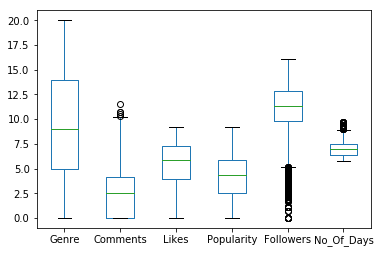

In [31]:
x[['Genre','Comments', 'Likes', 'Popularity', 'Followers', 'No_Of_Days']].plot(kind='box')

In [32]:
x[x['No_Of_Days'] == np.nan]

,Genre,Comments,Likes,Popularity,Followers,No_Of_Days


# Dealing with "INFINITY" values

In [33]:
x['Followers'] = x['Followers'].apply(lambda y: x['Followers'].median() if y == -np.inf else y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
x['Comments'] = x['Comments'].apply(lambda y: x['Comments'].median() if y == -np.inf else y)
x['Comments'] = x['Comments'].apply(lambda y: x['Comments'].median() if y == np.nan else y)

x['Likes'] = x['Likes'].apply(lambda y: x['Likes'].median() if y == -np.inf else y)
x['Likes'] = x['Likes'].apply(lambda y: x['Likes'].median() if y == np.nan else y)

x['Popularity'] = x['Popularity'].apply(lambda y: x['Popularity'].median() if y == -np.inf else y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

# Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


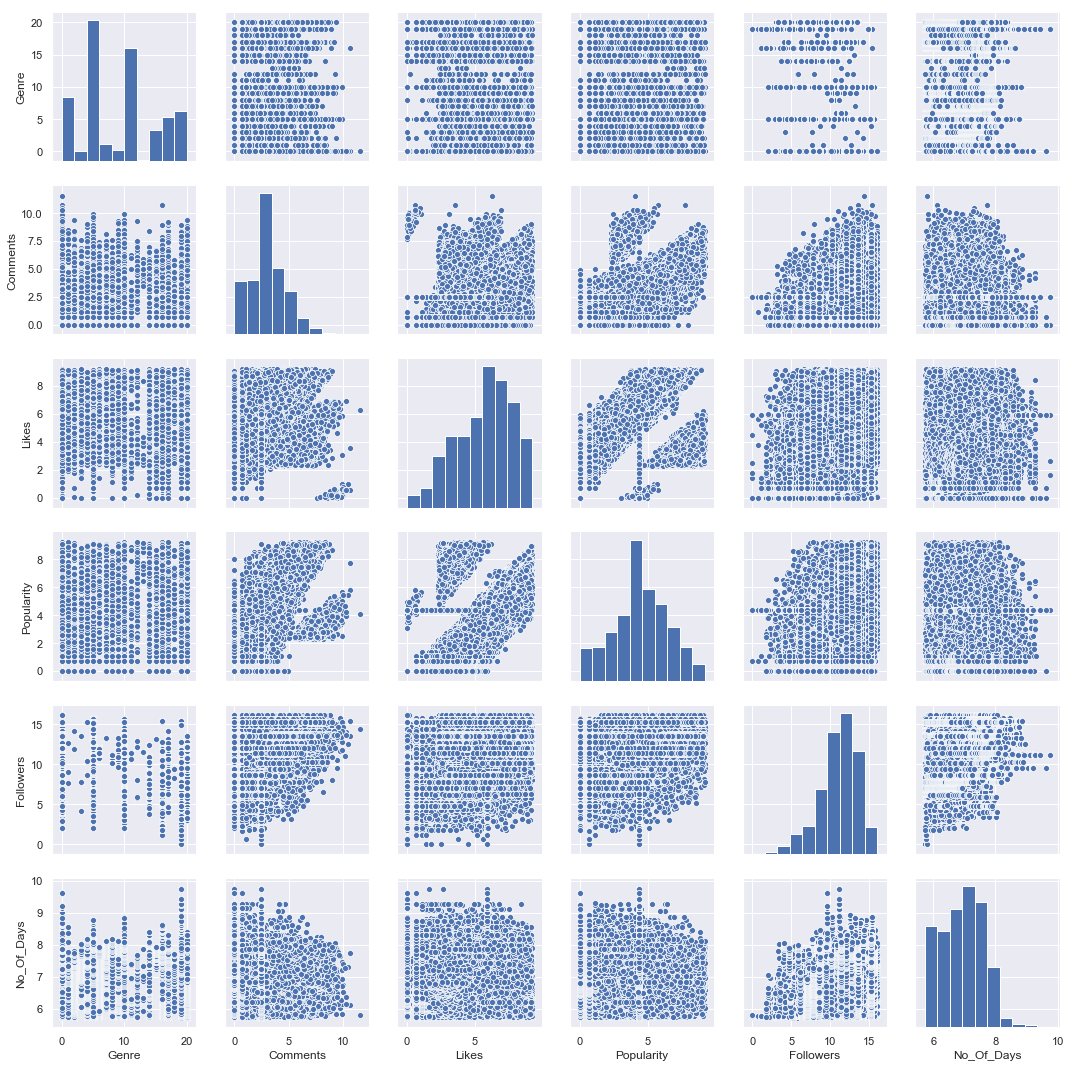

In [35]:
sns.set()
cols = ['Genre','Comments', 'Likes', 'Popularity', 'Followers', 'No_Of_Days']
sns.pairplot(x[cols], size = 2.5)
plt.show();

# Data Split

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [37]:
x.dtypes

Genre           int32
Comments      float64
Likes         float64
Popularity    float64
Followers     float64
No_Of_Days    float64
dtype: object

# Model Building

In [38]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#import xgboost as xgb
#import lightgbm as lgb

# Cross Validation
It's simple way to calculate error for evaluation.

KFold( ) splits the train/test data into k consecutive folds, we also have made shuffle attrib to True.

cross_val_score ( ) evaluate a score by cross-validation.

In [128]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Ridge Regression
It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
It reduces the model complexity by coefficient shrinkage.
It uses L2 regularization technique.


In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# ML Using Spark

In [45]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc= SparkContext()
sqlContext = SQLContext(sc)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-39-6a0b4a92b4a7>:3 

In [42]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Genre', 'Comments', 'Likes', 'Popularity', 'Followers', 'No_Of_Days'], outputCol = 'features')
x_df = vectorAssembler.transform(x)
x_df = vhouse_df.select(['features', 'MV'])
vhouse_df.show(3)

AttributeError: 'DataFrame' object has no attribute '_jdf'

In [41]:
x.columns

Index(['Genre', 'Comments', 'Likes', 'Popularity', 'Followers', 'No_Of_Days'], dtype='object')

# Test Data 

In [2]:

test_data = pd.read_csv("Data_Test.csv")

test_data.head(5)

test_data.shape


test_data.columns


# In[7]:

print("Arranging the COLUMNS and dropping 'Unique_ID', 'Name', 'Country' & 'Song_Name'")
test_data = test_data[['Genre', 'Timestamp', 'Comments', 'Likes', 'Popularity', 'Followers']]


print("Label-encoding of strings")

# In[8]:


print("applying labelecoder on Delivery_Time column")
from sklearn.preprocessing import LabelEncoder
laben = LabelEncoder()


test_data['Genre'] = laben.fit_transform(test_data['Genre'])


print("Pre-processing of Timestamp column")

# #### Resetting index

# In[12]:


test_data = test_data.reset_index().drop(['index'], axis=1)


print("Calculating AGE of the Song ")

# In[13]:


test_data['Date_of_release'] = test_data.Timestamp.str.split(" ", n = 1, expand = True)[0]


# In[14]:


test_data


# In[15]:


test_data['Date_of_release'] = pd.to_datetime(test_data['Date_of_release'])


# In[16]:


test_data['Today'] = pd.to_datetime('2019-12-30')


# In[17]:


test_data['No_Of_Days'] = (test_data['Today'] - test_data['Date_of_release'])

test_data['No_Of_Days'] = test_data['No_Of_Days'].astype(str).str.split(" ", n = 1, expand = True)[0]


print("Dropping Date and Timestamp columns")

# In[20]:


test_data.columns


# In[21]:


test_data.drop(['Timestamp', 'Date_of_release', 'Today'], axis=1, inplace=True)


# In[22]:


test_data.columns


print("Separating X and Y")

# In[23]:


x = test_data[['Genre', 'Comments', 'Likes', 'Popularity', 'Followers', 'No_Of_Days']]


print("Data Standanrdization")

# In[24]:


x.describe()


print("Data Transformation")

# In[25]:


x['Likes'] = x['Likes'].replace({",":"", "K":"", "M":""}, regex=True)
x['Likes'] = x['Likes'].astype(float)


# In[26]:


x['Popularity'] = x['Popularity'].replace({",":"", "K":"", "M":""}, regex=True).astype(float)


# In[27]:


x['No_Of_Days'] = x['No_Of_Days'].astype(int)


print("Log Transformation of Data")

# In[30]:


x['Followers'] = np.log(x['Followers'])
x['Comments'] = np.log(x['Comments'])
x['Likes'] = np.log(x['Likes'])
x['Popularity'] = np.log(x['Popularity'])
x['No_Of_Days'] = np.log(x['No_Of_Days'])


# In[31]:


x[['Genre','Comments', 'Likes', 'Popularity', 'Followers', 'No_Of_Days']].plot(kind='box')


# In[32]:


x[x['No_Of_Days'] == np.nan]


print("Dealing with 'INFINITY' values")

# In[33]:


x['Followers'] = x['Followers'].apply(lambda y: x['Followers'].median() if y == -np.inf else y)


# In[34]:


x['Comments'] = x['Comments'].apply(lambda y: x['Comments'].median() if y == -np.inf else y)
x['Comments'] = x['Comments'].apply(lambda y: x['Comments'].median() if y == np.nan else y)

x['Likes'] = x['Likes'].apply(lambda y: x['Likes'].median() if y == -np.inf else y)
x['Likes'] = x['Likes'].apply(lambda y: x['Likes'].median() if y == np.nan else y)

x['Popularity'] = x['Popularity'].apply(lambda y: x['Popularity'].median() if y == -np.inf else y)




Arranging the COLUMNS and dropping 'Unique_ID', 'Name', 'Country' & 'Song_Name'
Label-encoding of strings
applying labelecoder on Delivery_Time column
Pre-processing of Timestamp column
Calculating AGE of the Song 
Dropping Date and Timestamp columns
Separating X and Y
Data Standanrdization
Data Transformation
Log Transformation of Data


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in log


Dealing with 'INFINITY' values


In [3]:
x.to_csv("modified_test_data.csv")